In [63]:
import pandas as pd

df = pd.read_csv('tweets.csv', encoding = "utf-8" )

df.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [64]:
print('Data Size: ', df.shape)

Data Size:  (26747, 2)


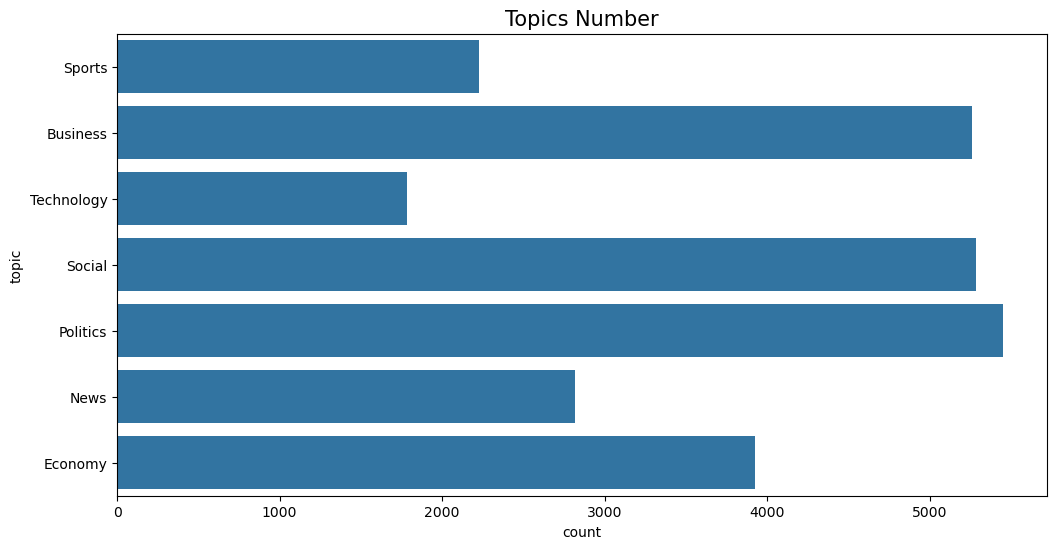

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(data=df, y='topic')
plt.title('Topics Number', fontsize = 15)
          
plt.show()

In [66]:
import string
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from snowballstemmer import stemmer 

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):

    emoj = re.compile('['
                      u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    tweet = re.sub(emoj, '', tweet)
    tweet = re.sub("@[^\s]+","",tweet)
    
    tweet = re.sub("RT","",tweet)
    
    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)
    
    tweet = re.sub(r'[0-9]+', '', tweet)  
    
    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")
 
    
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    
    english_punctuations = string.punctuation
    
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
     
    tweet = remove_repeating_char(tweet)
    
    tweet = tweet.replace('\n', ' ')  
      
    tweet = tweet.strip(' ')  
    return tweet



<>:44: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_19560\427283741.py:44: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub("@[^\s]+","",tweet)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
def tokenizeText(text):
    tokens_list = word_tokenize(text)
    return tokens_list

def filteringText(tokens_list):
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def  stemmingText(tokens_list):
    ar_stemmer = stemmer('arabic')
    tokens_list = [ar_stemmer.stemWord(word) for word in tokens_list]
    return tokens_list

def toSentence(words_list):
    sentence = ' '.join(word for word in words_list)
    return sentence

In [68]:
def process_tweet(tweet):
    tweet = clean_tweet(tweet)
    
    tokens_list = tokenizeText(tweet)
    tokens_list = filteringText(tokens_list)
    tokens_list = stemmingText(tokens_list)

    return tokens_list

In [69]:
example = " يا صديق @ انا لا ارييييد ان اذهب هناك 10 مساءا ، هل تريد ستذهب ؟/"

processed_tweet = process_tweet(example)
print(processed_tweet)

['صديق', 'انا', 'اريد', 'ان', 'اذهب', 'مساء', 'تريد', 'تذهب']


In [70]:
df['tweet'] = df['tweet'].apply(process_tweet)
df

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [71]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

df, y = oversample.fit_resample(df, df.topic)

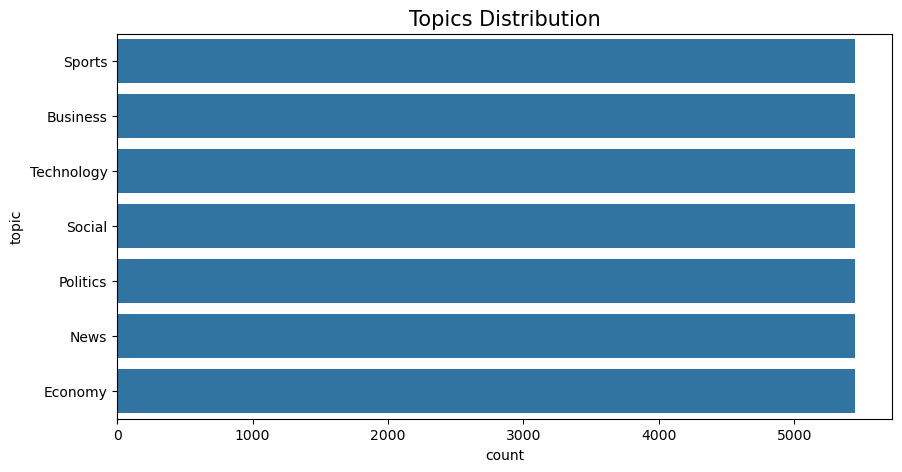

In [72]:
plt.figure(figsize=(10, 5))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution', fontsize=15)

plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['topics'] = df[['topic']].apply(le.fit_transform)

classes = le.classes_

n_classes = len(classes)
print('No. of classes: ', n_classes)
print('Types of classes: ', classes)
print('Coding: ', le.transform(classes))

No. of classes:  7
Types of classes:  ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [74]:
sentences = df['tweet'].apply(toSentence)
sentences

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145                زر اضاف مسابق مستقبلTECH يارب بشر يسر
38146                        نظر لون اخضر جديد لاجهز ايفون
38147       فزت معكم للان استلم جايز التح مسابق مستقبلTECH
38148                          ازرار اضاف مسابق مستقبلTECH
38149    ناو استاجر شقة او بيت او محل وتب تعرف سعر ال م...
Name: tweet, Length: 38150, dtype: object

In [75]:
!pip install tensorflow

In [76]:
!pip install keras

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()  # Create the tokenizer object

tokenizer.fit_on_texts(sentences)  # ✅ Correct method name
num_words = len(tokenizer.word_counts)  # Get the number of unique words
print('No. of words: ', num_words)
# print('Word Index:', tokenizer.word_index) # Print the tokenized word index

No. of words:  21984


In [78]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences)

X = tokenizer.texts_to_sequences(sentences)


In [79]:
print(X[0])
print(X[1])

[3223, 48, 1763, 230, 1363, 6316, 3065, 168, 168, 593, 2, 4526, 4527, 168]
[292, 1945, 248, 3224, 2928, 178, 293, 7535, 7536, 532, 1998, 5517, 155]


In [80]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 50

X = pad_sequences(X, maxlen = max_len)
print(X[0])
print(X[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 3223   48 1763  230 1363 6316
 3065  168  168  593    2 4526 4527  168]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  292 1945  248 3224 2928
  178  293 7535 7536  532 1998 5517  155]


In [81]:
tweets

,tweet,topic,topics
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports,5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports,5
2,"[عذيب, سعر, حال]",Business,0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports,5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology,6
...,...,...,...
38145,"[صحيح, استخدم, متصفح, سفار, وابحث, Google, محم...",Technology,6
38146,"[موتمر, GEC, يكون, رياض, تاريخ, موتمر, يكون, م...",Technology,6
38147,"[زر, اضاف, مسابق, مستقبلTECH, يارب, بشر, يسر]",Technology,6
38148,[مقبول],Technology,6


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [83]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

embed_dim = 42
hidden_unit = 16
dropout_rate = 0.2

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim= embed_dim, input_length= max_len))

model.add(LSTM(units = hidden_unit, dropout= dropout_rate))

model.add(Dense(units = len(classes), activation = 'softmax'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [87]:
history = model.fit(x_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(x_test, y_test))

Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6180 - loss: 1.1882 - val_accuracy: 0.8781 - val_loss: 0.4094
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9146 - loss: 0.2973 - val_accuracy: 0.9081 - val_loss: 0.3108
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9537 - loss: 0.1623 - val_accuracy: 0.9136 - val_loss: 0.3089
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9720 - loss: 0.1041 - val_accuracy: 0.9175 - val_loss: 0.2997
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9797 - loss: 0.0728 - val_accuracy: 0.9183 - val_loss: 0.3220
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9840 - loss: 0.0553 - val_accuracy: 0.9182 - val_loss: 0.3339
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9872 - loss: 0.0462 - val_accuracy: 0.9176 - val_loss: 0.3497
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9889 - loss: 0.0374 - 

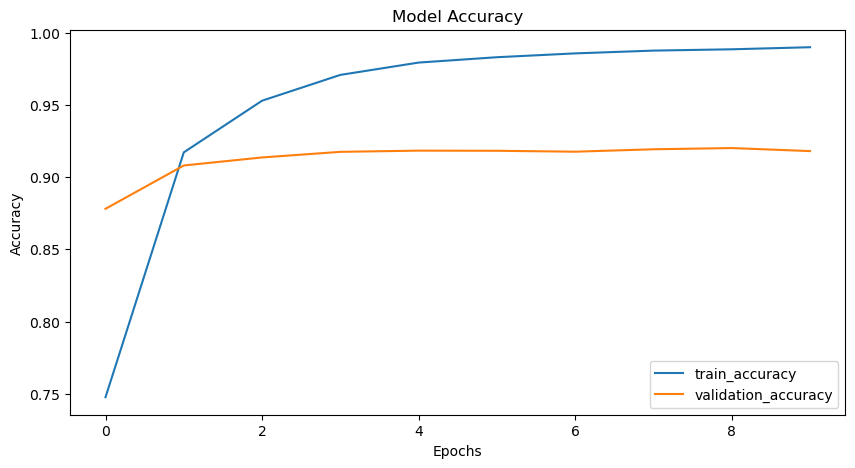

In [89]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(history.history['accuracy'], label= ['train_accuracy'])
ax.plot(history.history['val_accuracy'], label= ['validation_accuracy'])

ax.set_title('Model Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

ax.legend(loc='lower right')            
plt.show()      

In [90]:
model.save('person_classification_model.keras')

import pickle
tokenizer_path = 'person_classification_tokenizer'
with open(tokenizer_path, 'wb') as file:
    pickle.dump(tokenizer, file)

In [113]:
import numpy as np

def classify_tweet(df, model, tokenizer, max_len=50):
    seq = tokenizer.texts_to_sequences([df])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(pad)
    pred = np.argmax(pred)
    return pred

In [114]:
from keras.models import load_model
import pickle
classes= ['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name, model_path, tokenizer_path, person_path):
    
    model = load_model(model_path)
    
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)
    
    df = pd.read_csv(person_path)
    
    classes_count=dict()
    
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0

    for _, row in df.iterrows():
        tweet = row['tweet']
        
        processed_tweet=process_tweet(tweet)
        
        code= classify_tweet(processed_tweet, model, tokenizer)
        
        topic=classes[code]
        
        classes_count[topic]=classes_count[topic]+1
 

    x = classes_count.keys()
    y = classes_count.values()

    import matplotlib.pyplot as plt
    # pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

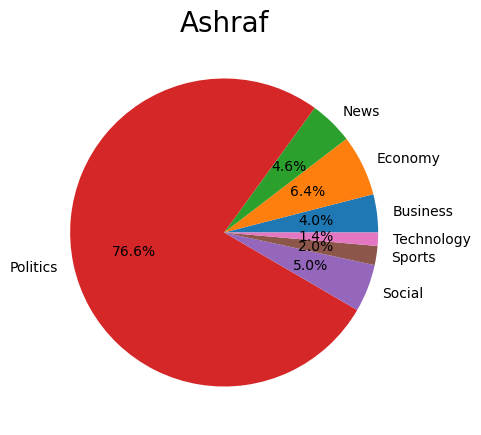

In [115]:
classify_person("Ashraf", 'person_classification_model.keras',
                'person_classification_tokenizer','ashraf.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━

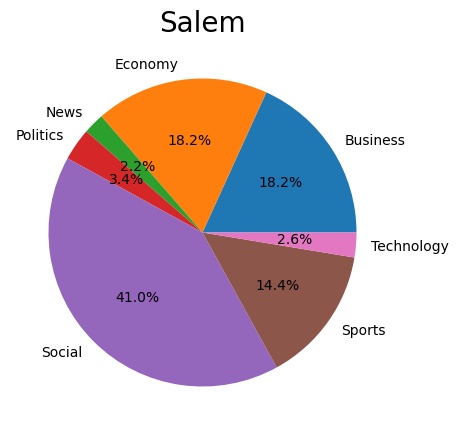

In [116]:
classify_person("Salem",'person_classification_model.keras',
                'person_classification_tokenizer','salem.csv')